In [9]:
%matplotlib inline
import nibabel as nib
from nilearn import plotting as niplt
import numpy as np

Here, I'm going to create the mask that defined MFC for further analysis.

First, I load a cerebral cortex probabilty map, from the Harvard Oxford atlas 

In [3]:
cortex = nib.load('cerbcort.nii.gz')

C:\Users\kkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  


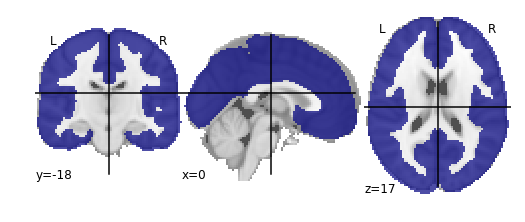

In [11]:
# Binarize
cortex = nib.Nifti1Image((cortex.get_data() > 0).astype('int'), cortex.get_header().get_best_affine())
niplt.plot_roi(cortex)

C:\Users\kkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  


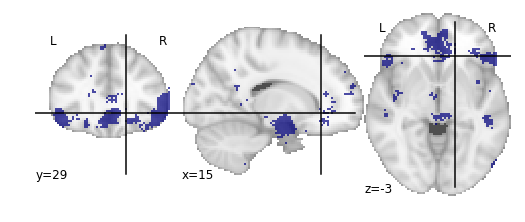

In [20]:
task1 = nib.load('EVT AT FDR_0.01.nii.gz')
task1 = nib.Nifti1Image((task1.get_data() > 0).astype('int'), task1.get_header().get_best_affine())
task1.get_data()[task1.get_data() > 0] = 1
niplt.plot_roi(task1)

In [21]:
nib.save(task1, 'EVT mask.nii')

In [15]:

import os
cwd = os.getcwd()
print(cwd)

C:\Users\kkim\Desktop\neurosynth-mfc-master\other


Next, I use meshgrid to mask voxels based on location. Importantly, we use nibabel's affine to convert an MNI coordinate (e.g. 10, 0, 0), to voxel space. 

In [19]:
i, j, k = np.meshgrid(*map(np.arange, cortex.get_data().shape), indexing='ij')

# Maximum left and right X coordinates
X_l = nib.affines.apply_affine(np.linalg.inv(cortex.get_affine()), [-10, 0, 0])[0]
X_r = nib.affines.apply_affine(np.linalg.inv(cortex.get_affine()), [10, 0, 0])[0]

# Maximum Y and Z coordinates
Y = nib.affines.apply_affine(np.linalg.inv(cortex.get_affine()), [0, -22, 0])[1]
Z = nib.affines.apply_affine(np.linalg.inv(cortex.get_affine()), [0, 0, -32])[2]

Finally, we use the voxel space coordinates to mask the 30% Harvard-Oxford cortical mask, and binarize it

In [21]:
## Exclude lateral 
cortex.get_data()[
    np.where((i < X_r) | 
             (i > X_l))] = 0

# Exclude posterior
cortex.get_data()[
    np.where(j < Y)] = 0

## Exclude ventral 
cortex.get_data()[
    np.where(k < Z)] = 0

# Binarize
cortex.get_data()[cortex.get_data() < 1] = 0
cortex.get_data()[cortex.get_data() >= 1] = 1

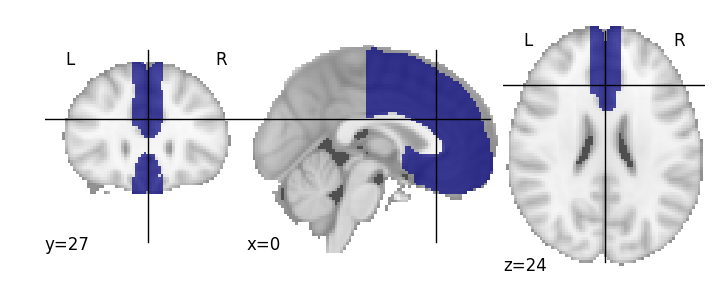

In [22]:
niplt.plot_roi(cortex)